In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates


In [16]:
r = requests.get("http://192.168.1.89:8081/api/v1/market")
r.json()

{'date': '2028-09-09T16:00:00Z',
 'lastMonthAveragePrice': 60.21,
 'marketTrajectory': 'NORMAL'}

In [4]:
r = requests.get("http://192.168.1.89:8081/api/v1/stocks/detailed")
df = pd.DataFrame(r.json())
news = df[df['ticker']=='AMZN']
pd.json_normalize(news,record_path=['newsHistory'])

#https://towardsdatascience.com/how-to-convert-json-into-a-pandas-dataframe-100b2ae1e0d8




TypeError: string indices must be integers, not 'str'

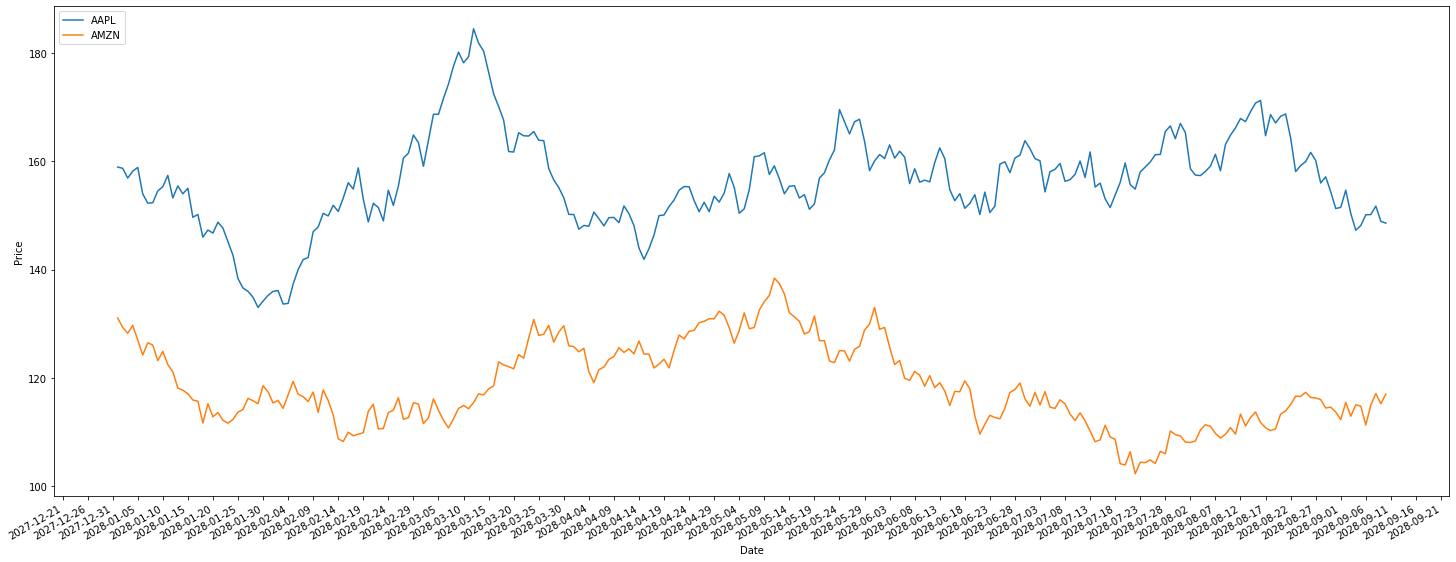

In [17]:
r = requests.get("http://192.168.1.89:8081/api/v1/stocks/detailed")
j = r.json()
plt.figure(figsize=(25, 10),dpi=72) 
for stock in j:
   # print(stock['ticker'])
   if stock['ticker'] in ['AAPL','AMZN']:
       mh = pd.DataFrame(stock['priceHistory'])

       mh['marketDate'] = mh['marketDate'].apply(lambda x: datetime.fromisoformat(x))
       mh = mh.sort_values('marketDate', ascending=True).reset_index(drop=True)
       plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
       plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
       plt.plot(mh['marketDate'],mh['stockPrice'],label=stock['ticker'])
       plt.gcf().autofmt_xdate()
       plt.xlabel('Date', fontsize=10)
       plt.ylabel('Price',fontsize=10)
       plt.legend(loc="upper left")


plt.show()


In [9]:
mh

r = requests.get("http://localhost:8080/api/v1/stocks/AAPL")
r.json()

{'ticker': 'AAPL',
 'companyName': 'Apple',
 'sector': 'Technology',
 'marketCap': 'Large',
 'price': 98.51,
 'lastDayPrice': 98.35,
 'percentChange': 0.16,
 'momentum': 0,
 'momentumStreakInDays': 2,
 'volatileStock': 'VOLATILE',
 'investorRating': 'Buy',
 'newsHistory': [],
 'earningsHistory': [{'estimatedEPS': 2.13,
   'actualEPS': 2.7,
   'reportMessage': 'Date: 3/1/1. Apple announces stable profits in new earnings report today. Their EPS of 2.7 fell in line with expectations of 2.13 EPS.',
   'dateOfRelease': '3/1/1'}],
 'priceHistory': [{'marketDate': '1/1/1', 'stockPrice': 101.37},
  {'marketDate': '1/10/1', 'stockPrice': 95.09},
  {'marketDate': '1/11/1', 'stockPrice': 95.51},
  {'marketDate': '1/12/1', 'stockPrice': 98.73},
  {'marketDate': '1/13/1', 'stockPrice': 99.73},
  {'marketDate': '1/14/1', 'stockPrice': 102.25},
  {'marketDate': '1/15/1', 'stockPrice': 103.06},
  {'marketDate': '1/16/1', 'stockPrice': 106.22},
  {'marketDate': '1/17/1', 'stockPrice': 108.52},
  {'mark